# Simple Logistic Regression: predicting students admission rate

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("dataset_admissions.csv")

In [3]:
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
data.std() # std() is to get the standard deviation.  measure the amount of variation of a set of values. describes how spread out the values are.

admit      0.466087
gre      115.516536
gpa        0.380567
rank       0.944460
dtype: float64

In [7]:
pd.crosstab(data['admit'], data['rank'], rownames = ['admit'])

rank,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


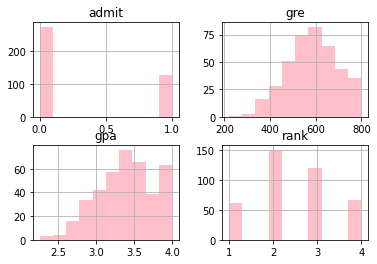

In [9]:
data.hist(color="pink")
plt.show()

In [11]:
dummy_rank = pd.get_dummies(data['rank'],prefix="rank")
dummy_rank.head()

,rank_1,rank_2,rank_3,rank_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [14]:
collumns_to_keep = ['admit','gre','gpa']
data = data[collumns_to_keep].join(dummy_rank[['rank_2','rank_3','rank_4']])
data.head()

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [15]:
# defining x and y
X = data.drop('admit',axis=1) # In pandas, axis=1 stands for columns 
X

,gre,gpa,rank_2,rank_3,rank_4
0,380,3.61,0,1,0
1,660,3.67,0,1,0
2,800,4.00,0,0,0
3,640,3.19,0,0,1
4,520,2.93,0,0,1
...,...,...,...,...,...
395,620,4.00,1,0,0
396,560,3.04,0,1,0
397,460,2.63,1,0,0
398,700,3.65,1,0,0


In [16]:
Y = data['admit']
Y

0      0
1      1
2      1
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: admit, Length: 400, dtype: int64

# Part 2

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_real = train_test_split(X,Y,test_size=0.2)

In [18]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = 'liblinear')

In [19]:
log_reg.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [20]:
y_pred = log_reg.predict(X_test)

In [21]:
y_pred #note the large amount of zeros

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [22]:
from sklearn import metrics

In [24]:
cm = metrics.confusion_matrix(Y_real,y_pred)

<AxesSubplot:>

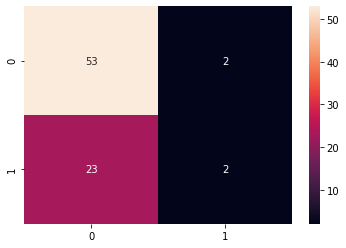

In [25]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [ ]:
### Performance Measurement 

In [27]:
acc = metrics.accuracy_score(Y_real,y_pred) # true negatives + true positives / true positives + false positives + true negatives + false negatives
acc

0.6875

In [28]:
precision = metrics.precision_score(Y_real,y_pred) # precision = true positive / true positive + false positive
precision

0.5

In [30]:
recall = metrics.recall_score(Y_real,y_pred) #recall = true positive / true positive + false negative
recall

0.08